In [84]:
"""
Created on Wed Dec 26 15:15:23 2018

@author: Dhurba Bhandari
"""

# Importing the libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [85]:
#path of data must be according location of file.
#or you can just create TitanicProject folder ond Desktop and place file in it.
med_data =pd.read_csv(r'C:\Users\Hp\Desktop\TitanicProject\medd.csv',encoding = "ISO-8859-1")


In [86]:
#here is the data (top 5 rows)
med_data.head()


,Age,AgeUnit,ageCalcYears,Sex,Address,Health Facility,Registration No.,Triage level,Arrival Date,Arrival Time,Date of onset,Onset Time,fever,Diarrhoea,Vomiting,Headache,Abdmonial pain,others,Prov. Diagnosis,Outcome (admitted refered discharged readminision)
0,9,NaN,9,F,NaN,Dhulikhel Hospital,NaN,NaN,8-Sep-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discharged
1,13,NaN,13,F,NaN,Dhulikhel Hospital,NaN,NaN,8-Sep-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discharged
2,20,NaN,20,F,Panchkhal,Dhulikhel Hospital,832914.0,Green,8-Sep-18,13:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discharged
3,14,NaN,14,F,Panchkhal 9,Dhulikhel Hospital,NaN,NaN,8-Sep-18,15:35,NaN,NaN,Yes,Yes,Yes,No,NaN,Stomache ache,Food poisoning,Under Treatment
4,5,NaN,5,F,Panchkhal 12,Dhulikhel Hospital,NaN,NaN,8-Sep-18,11:26,NaN,19:00,Yes,Yes,Yes,No,NaN,NaN,NaN,Under Treatment


##### This data seems to have lots of null cells. Let's count them first

In [87]:
med_data.isnull().sum()

Age                                                     5
AgeUnit                                               273
ageCalcYears                                            5
Sex                                                     0
Address                                                34
Health Facility                                         0
Registration No.                                      221
Triage level                                          234
Arrival Date                                           65
Arrival Time                                          238
Date of onset                                         240
Onset Time                                            229
fever                                                  99
Diarrhoea                                              60
Vomiting                                               64
Headache                                              109
Abdmonial pain                                        166
others        

There it seems to be lots of null values in given data. Age unit has 273 null values out of 372 cells. Likewise Health Facility, Registration No. ,Arrival Date, Arrival Time, Date of onset and Others columns seems to have more than 50% null valued cells.




#### Here AgeUnit column does't play any vital role and also most of the data has been lost. So we will be dropping AgeUnit column 

Also two columns Age and ageCalcYears are exactely same so dropping ageCalxYears too

In [88]:
med_data=med_data.drop(['AgeUnit','ageCalcYears'],axis=1)


In [89]:
med_data.head()

,Age,Sex,Address,Health Facility,Registration No.,Triage level,Arrival Date,Arrival Time,Date of onset,Onset Time,fever,Diarrhoea,Vomiting,Headache,Abdmonial pain,others,Prov. Diagnosis,Outcome (admitted refered discharged readminision)
0,9,F,NaN,Dhulikhel Hospital,NaN,NaN,8-Sep-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discharged
1,13,F,NaN,Dhulikhel Hospital,NaN,NaN,8-Sep-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discharged
2,20,F,Panchkhal,Dhulikhel Hospital,832914.0,Green,8-Sep-18,13:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discharged
3,14,F,Panchkhal 9,Dhulikhel Hospital,NaN,NaN,8-Sep-18,15:35,NaN,NaN,Yes,Yes,Yes,No,NaN,Stomache ache,Food poisoning,Under Treatment
4,5,F,Panchkhal 12,Dhulikhel Hospital,NaN,NaN,8-Sep-18,11:26,NaN,19:00,Yes,Yes,Yes,No,NaN,NaN,NaN,Under Treatment


AgeUnit and ageCalcYears got removed.

derive  AgeClass column  from Age column

In [92]:
med_data.head()
AgeClass = []
for age in med_data['Age']:
    if float(age) <= 13:
        AgeClass.append('Kids')
    elif float(age) >13 and float(age) <= 19:
        AgeClass.append('Teens')
    elif float(age) >19 and float(age)<=30:
        AgeClass.append('Youths')
    elif float(age) >30 and float(age) <=50:
        AgeClass.append('Matures')
    else:
        AgeClass.append('Old aged')
med_data['AgeClass']=AgeClass
med_data[['Age','AgeClass']].head()



,Age,AgeClass
0,9,Kids
1,13,Kids
2,20,Youths
3,14,Teens
4,5,Kids


9 years old classified as Kid
20 years old classified as Youth 
and
so on....

#### Let's take care of Address before proceeding

Here some cells in address columns are null. So make NaN value as unknwon address value.


In [93]:
med_data['Address']=med_data['Address'].fillna('unknown')

Panchkhal, Panchkhal 9, PANCHKHAL are meant to be same here.

So Convert all cells with panchkhal address in a same way

In [94]:
med_data['Address'] = med_data['Address'].str.split(' ').str[0]


Triage level column need to have some consistency.

In [96]:
# If we see Triage level column. Green and green meant to be same and for all other levels.
#let's fill and make Triage level column consistent.
med_data['Triage level']=med_data['Triage level'].fillna('Data lost')
med_data['Triage level']=med_data['Triage level'].str.capitalize()

In [102]:
med_data['Address']=med_data['Address'].str.split('-').str[0]
med_data['Address']=med_data['Address'].str.capitalize()
med_data.iloc[10:20,0:6]

,Age,Sex,Address,Health Facility,Registration No.,Triage level
10,33,F,Unknown,Dhulikhel Hospital,NaN,Data lost
11,40,F,Unknown,Dhulikhel Hospital,NaN,Data lost
12,13,M,Panchkhal,Dhulikhel Hospital,NaN,Yellow
13,16,M,Panchkhal,Dhulikhel Hospital,NaN,Data lost
14,8,M,Unknown,Dhulikhel Hospital,NaN,Green
15,30,M,Panchkhal,Dhulikhel Hospital,NaN,Yellow
16,42,M,Panchkhal,Dhulikhel Hospital,NaN,Yellow
17,65,M,Panchakhal,Dhulikhel Hospital,NaN,Data lost
18,29,F,Unknown,Dhulikhel Hospital,NaN,Data lost
19,9,M,Unknown,Dhulikhel Hospital,NaN,Data lost


Here Address and Triage levels are brought down in the same form.


eg. Panchkhal --> panchkhal

    PANCHKHAL --> panchkhal
    
    green -->  Green


Registration Column cleaning:

In [104]:
med_data['Registration No.']=med_data['Registration No.'].fillna('Not Registered')

##### Parsing Dates:

Arrival Date and Date of onset are on string form.
So, let's convert those in DateTime object.

In [105]:
med_data['Arrival Date']=pd.to_datetime(med_data['Arrival Date'])


In [106]:
med_data['Arrival Time'] = pd.to_datetime(med_data['Arrival Time'],format= '%H:%M' ).dt.time
                

In [107]:
med_data['Date of onset']=pd.to_datetime(med_data['Date of onset'])

'fever','Diarrhoea','Vomiting','Headache','Abdmonial pain','others' Some are provided with Yes and No status.

Blank cells must have been left indicating no sign of corresponding symptom.

So filling all blank cell with No.

In [111]:
med_data.loc[:,['fever','Diarrhoea','Vomiting','Headache','Abdmonial pain','others']]=med_data.loc[:,['fever','Diarrhoea','Vomiting','Headache','Abdmonial pain','others']].fillna('No')


In [112]:

med_data['fever']=med_data['fever'].str.capitalize()
med_data['Diarrhoea']=med_data['Diarrhoea'].str.capitalize()

med_data['Vomiting']=med_data['Vomiting'].str.capitalize()
med_data['Abdmonial pain']=med_data['Abdmonial pain'].str.capitalize()
med_data['others']=med_data['others'].str.capitalize()

Again done same as above:
    
    eg. yes --> Yes
        no --> No

In [114]:
med_data.loc[:,['fever','Diarrhoea','Vomiting','Headache','Abdmonial pain','others']].head()

,fever,Diarrhoea,Vomiting,Headache,Abdmonial pain,others
0,No,No,No,No,No,No
1,No,No,No,No,No,No
2,No,No,No,No,No,No
3,Yes,Yes,Yes,No,No,Stomache ache
4,Yes,Yes,Yes,No,No,No


Diagnosis that aren't specified are assigned as 'uncategorized' status.

In [117]:
med_data['Prov. Diagnosis']=med_data['Prov. Diagnosis'].fillna('uncategorized')
med_data['Prov. Diagnosis']=med_data['Prov. Diagnosis'].str.capitalize()

Not specified outcome cells are assigned with  Unknown status

In [120]:
med_data['Outcome (admitted refered discharged readminision)']=med_data['Outcome (admitted refered discharged readminision)'].fillna('Unknown')
med_data['Outcome (admitted refered discharged readminision)']=med_data['Outcome (admitted refered discharged readminision)'].str.capitalize()

### The  Final Date after cleaning and filling 

In [122]:
med_data.head()

,Age,Sex,Address,Health Facility,Registration No.,Triage level,Arrival Date,Arrival Time,Date of onset,Onset Time,fever,Diarrhoea,Vomiting,Headache,Abdmonial pain,others,Prov. Diagnosis,Outcome (admitted refered discharged readminision),AgeClass
0,9,F,Unknown,Dhulikhel Hospital,Not Registered,Data lost,2018-09-08,NaT,NaT,NaN,No,No,No,No,No,No,Uncategorized,Discharged,Kids
1,13,F,Unknown,Dhulikhel Hospital,Not Registered,Data lost,2018-09-08,NaT,NaT,NaN,No,No,No,No,No,No,Uncategorized,Discharged,Kids
2,20,F,Panchkhal,Dhulikhel Hospital,832914,Green,2018-09-08,13:50:00,NaT,NaN,No,No,No,No,No,No,Uncategorized,Discharged,Youths
3,14,F,Panchkhal,Dhulikhel Hospital,Not Registered,Data lost,2018-09-08,15:35:00,NaT,NaN,Yes,Yes,Yes,No,No,Stomache ache,Food poisoning,Under treatment,Teens
4,5,F,Panchkhal,Dhulikhel Hospital,Not Registered,Data lost,2018-09-08,11:26:00,NaT,19:00,Yes,Yes,Yes,No,No,No,Uncategorized,Under treatment,Kids


### Time for visualizing the Data

Let's anlyze patients based on gender

In [123]:
med_data.groupby(med_data['Sex']).size()

Sex
F    276
M     95
dtype: int64

That's interesting!
Out of 371 patients 276 are female

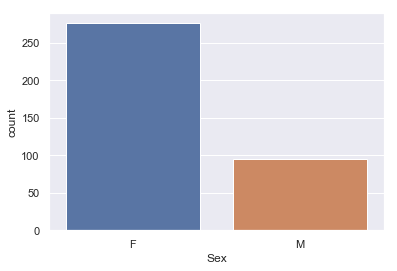

In [124]:
%matplotlib inline
sns.set()
sns.countplot(x='Sex', data=med_data);

##### Triage level Distribution

In [126]:
med_data.groupby(['Triage level']).size()


Triage level
Data lost    234
Green         48
Red           32
Yellow        57
dtype: int64

Normal, Urgent and Emergent cases are visualized from that result

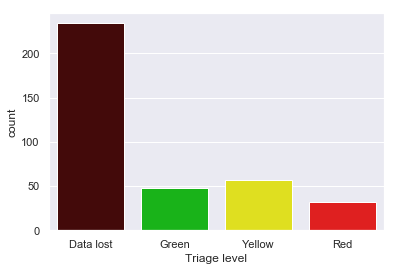

In [127]:
sns.countplot(x='Triage level', data=med_data,palette=["#4d0000", "#00cc00","#ffff00", "#ff0000"]);

In [128]:
med_data.groupby(['AgeClass']).size()


AgeClass
Kids        126
Matures     117
Old aged     45
Teens        28
Youths       55
dtype: int64

###### Which Age class patients are visiting more

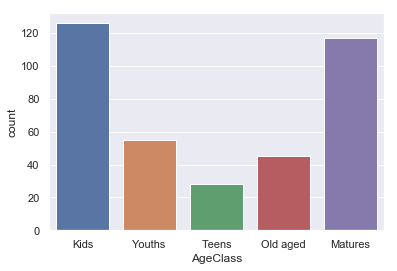

In [129]:
sns.countplot(x='AgeClass', data=med_data)

######  Locations from where patients are coming most?

In [130]:
med_data.groupby(['Address']).size()


Address
Aapghari         10
Baluwa            1
Baskote           1
Baskothi          1
Bhimshenthan      3
Bhulu             1
Hokshey           1
Kaskote           1
Kharethok         1
Koshkate          1
Naagbeli         12
Nagbeni           1
Namobuddha        1
Palanchock        1
Panchakhal       70
Panchkahal        1
Panchkhal       177
Pnchakhal         1
Ramche           11
Thulogau          1
Tinghare         40
Unknown          34
dtype: int64

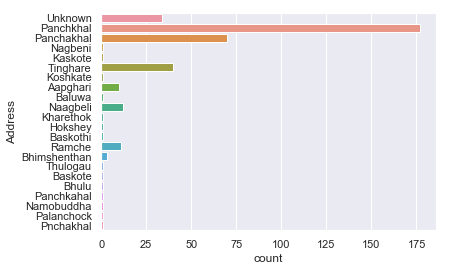

In [131]:
sns.countplot(y='Address', data=med_data)

In [132]:
med_data.groupby(['Health Facility']).size()


Health Facility
Baluwa Outreach Center           38
Banepa Hospital                   5
Dhulikhel Hospital              114
Panchkhal PHC                    69
Panchkhal Polyclinic             47
Sir Memorial Hospital Banepa     98
dtype: int64

######  Which Hospital/Clinic patients are coming from

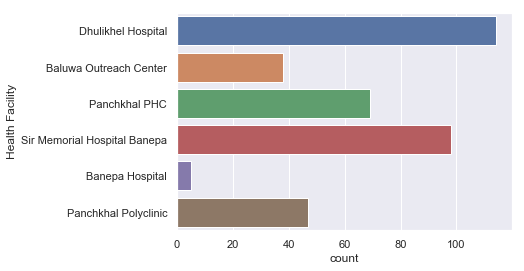

In [133]:
sns.countplot(y='Health Facility', data=med_data) 

In [134]:
med_data.groupby(['fever']).size()


fever
No     190
Yes    181
dtype: int64

###### 'fever','Diarrhoea','Vomiting','Headache','Abdmonial pain','others' How is it infecting patients

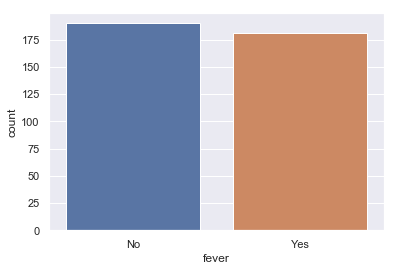

In [136]:
sns.countplot(x='fever', data=med_data)

In [137]:
med_data.groupby(['Diarrhoea']).size()


Diarrhoea
No      72
Yes    299
dtype: int64

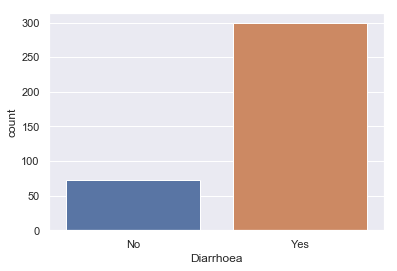

In [138]:
sns.countplot(x='Diarrhoea', data=med_data)

In [139]:
med_data.groupby(['Vomiting']).size()


Vomiting
No     112
Yes    259
dtype: int64

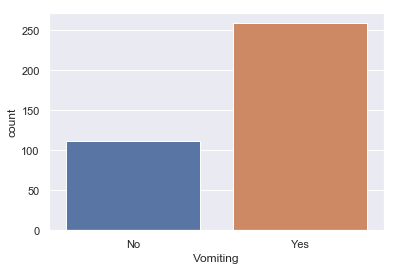

In [140]:
sns.countplot(x='Vomiting', data=med_data)

In [141]:
med_data.groupby(['Headache']).size()


Headache
No     190
Yes    181
dtype: int64

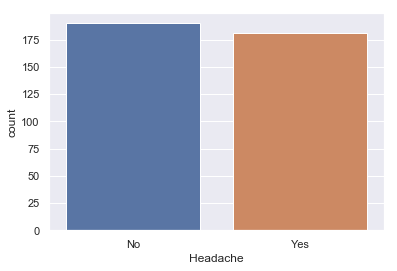

In [142]:
sns.countplot(x='Headache', data=med_data)

In [143]:
med_data.groupby(['Abdmonial pain']).size()


Abdmonial pain
No     204
Yes    167
dtype: int64

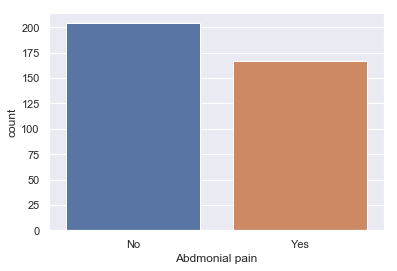

In [144]:
sns.countplot(x='Abdmonial pain', data=med_data)

######  Diagnosis satistics

In [146]:
med_data.groupby(['Prov. Diagnosis']).size()


Prov. Diagnosis
Age                                6
Age / food poisoning               3
Age with moderate dehydration      2
Age with some dehydration          3
Burning sensation                  1
Food poisoning                   238
Nausea                             1
Uncategorized                    117
dtype: int64

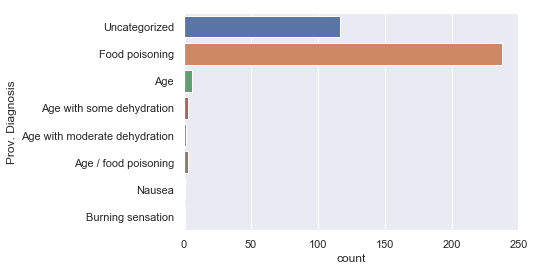

In [147]:
sns.countplot(y='Prov. Diagnosis', data=med_data)

Most of the patients have issue of Food Poisoning


##### Let's See Outcome distribution


In [148]:
med_data.groupby(['Outcome (admitted refered discharged readminision)']).size()


Outcome (admitted refered discharged readminision)
Admitted                                            2
Discharged                                         86
Discharged on 10th sep. 2018                        1
Discharged on 13th sep. 2018                        2
Discharged on10th sep. 2018                        11
Discharged on11st sep. 2018                        39
Discharged on11th sep. 2018                        27
Discharged on12st sep. 2018                         2
Discharged on12th sep. 2018                        13
Discharged on13th sep. 2018                         4
Discharged on8th sep. 2018                          4
Discharged on9th sep. 2018                         22
Referred tdhulikhel hospitalon 10th sep. 2018       1
Referred tdhulikhel hospitalon 9th sep. 2018        1
Referred to dhulikhel hospitalon 9th sep. 2018      1
Referred to kmc on 8th sep. 2018                    1
Referred to kmc on 9th sep. 2018                    2
Referred to teaching hospital o

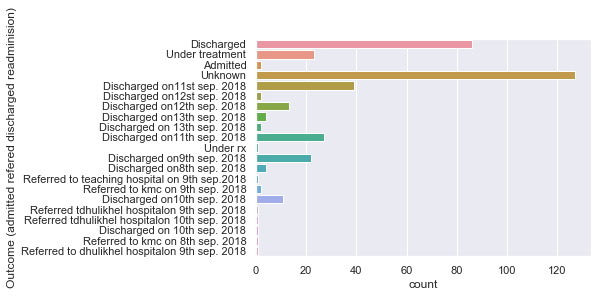

In [149]:
sns.countplot(y='Outcome (admitted refered discharged readminision)', data=med_data)

######  Cases of Normal, Urgent, Emergent according to Gender

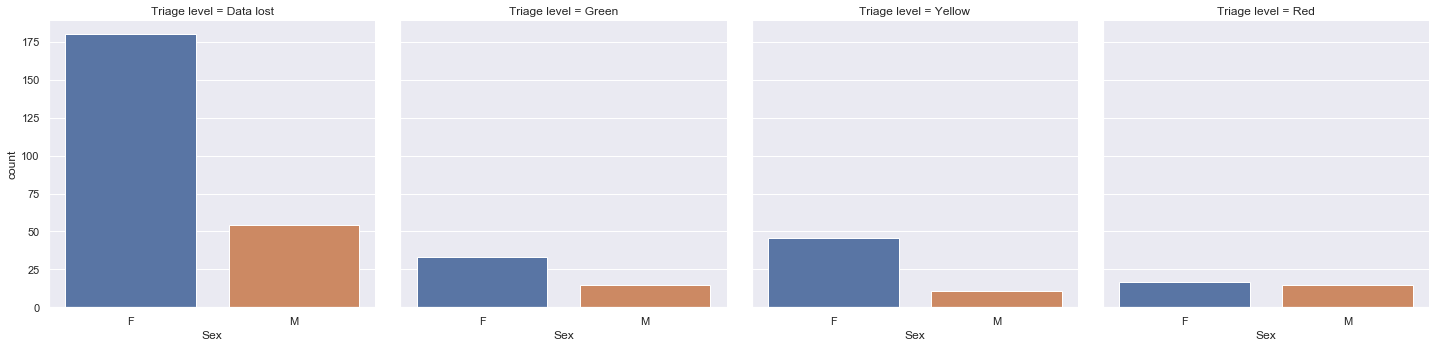

In [153]:
sns.catplot(x='Sex', col='Triage level', kind='count', data=med_data)

In [154]:
age=med_data['Age'].dropna()
age=age.sort_values(ascending=True)

###### Patients from which Hospita/Clinic are more critical?

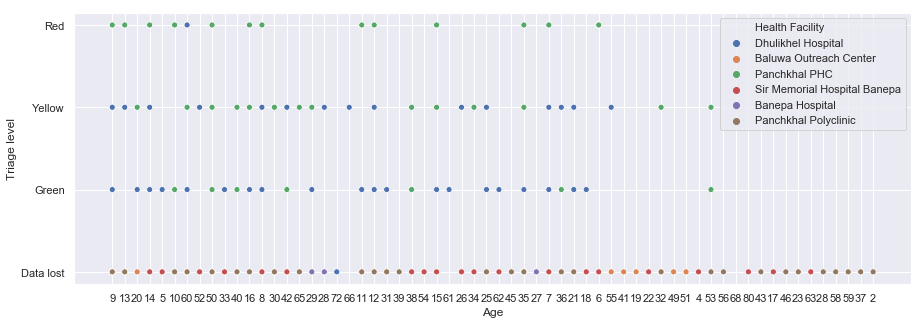

In [157]:
sns.set(rc={'figure.figsize':(15,5)})
    
sns.scatterplot(x="Age", y="Triage level", hue="Health Facility",data=med_data)

#####  Age Distribution. 
 - What Ages are mostly visitng?

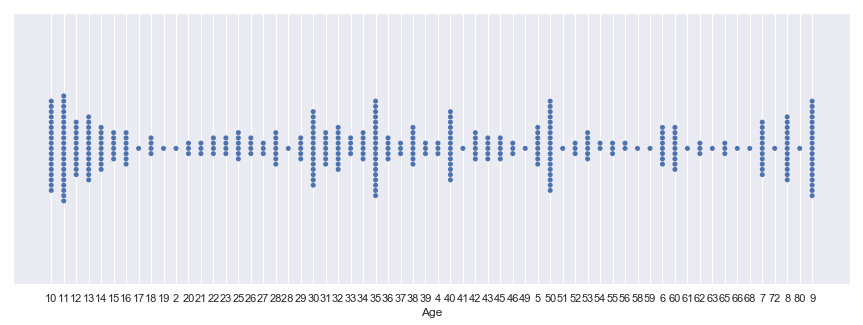

In [158]:
sns.swarmplot(x=age)

In [159]:
med_data['Age']=pd.to_numeric(med_data['Age'], errors='coerce')


###### Outcome Distribution of patients according to ages

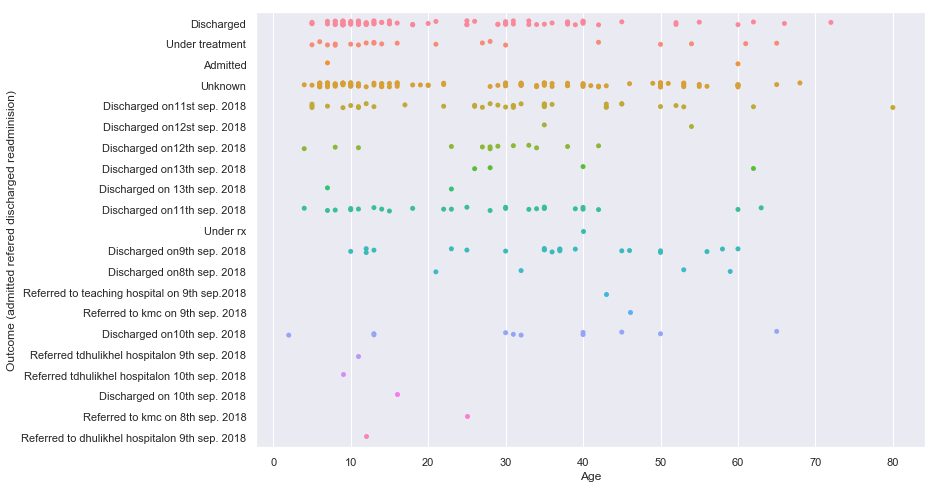

In [161]:
sns.set(rc={'figure.figsize':(12,8)})
sns.stripplot(x="Age", y="Outcome (admitted refered discharged readminision)", data=med_data,jitter=True)


###### How are Diagnosis according to Triage level

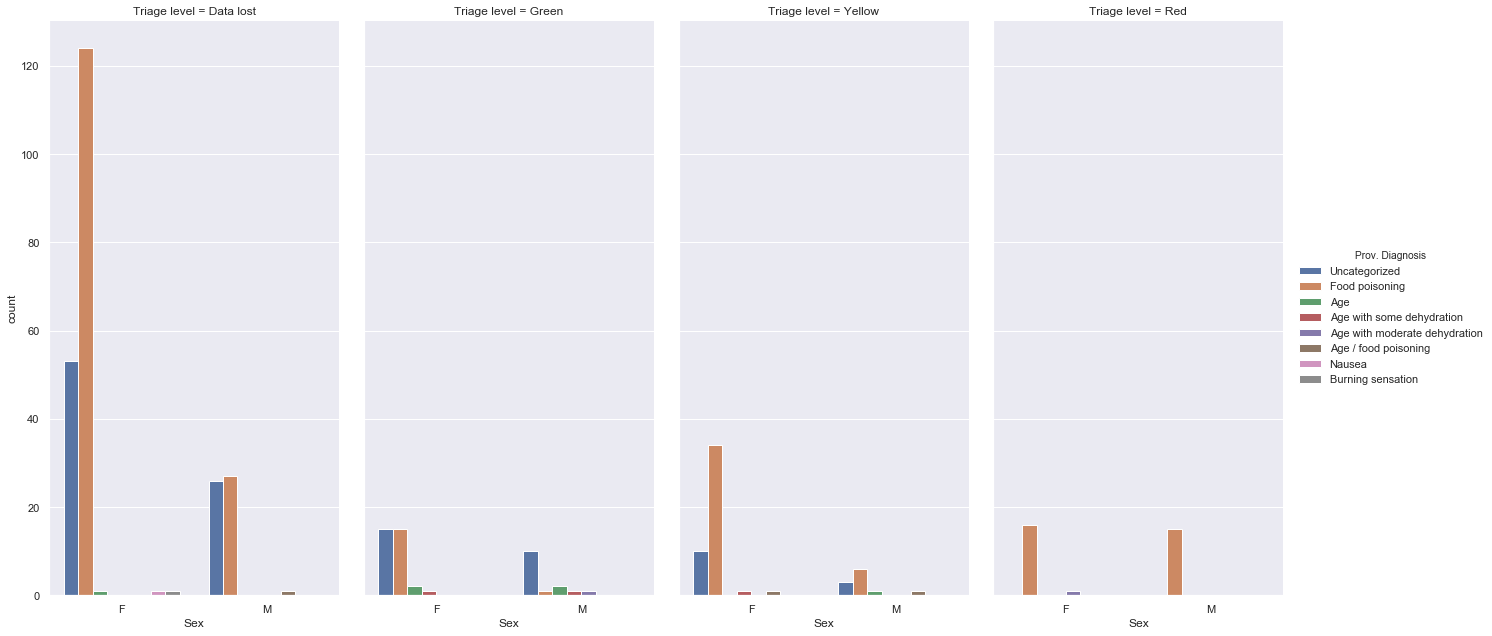

In [169]:
sns.catplot(x="Sex", hue="Prov. Diagnosis", col="Triage level",data=med_data, kind="count",height=9, aspect=.5);


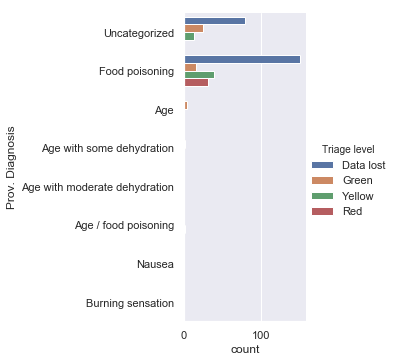

In [170]:
sns.catplot(y="Prov. Diagnosis", hue="Triage level",data=med_data, kind="count");


In [172]:
med_data['Diff']=med_data['Arrival Date'].sub(med_data['Date of onset'], axis=0).fillna('Not specified')
        

######  Differences between onset and arrival
 - Show gap between onset of symptoms and patients arrival to clinic

In [173]:
med_data.groupby(med_data['Diff']).size()

Diff
0 days 00:00:00     75
1 days 00:00:00     53
2 days 00:00:00      3
Not specified      240
dtype: int64

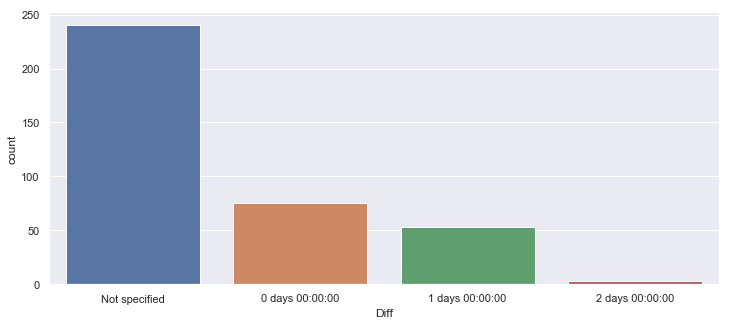

In [174]:
sns.countplot(x='Diff', data=med_data)

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


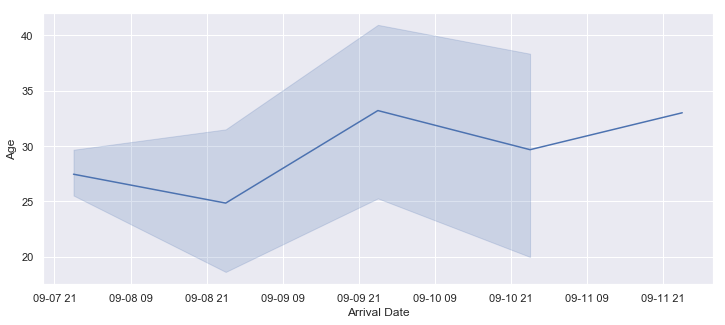

In [171]:
sns.set(rc={'figure.figsize':(12,5)})
sns.lineplot(x="Arrival Date", y="Age", data=med_data)
